# Working With Pandas And Matplotlib

This problem gives you an intro to doing Data Analysis with Pandas. The question is kept sligtly open ended on in the sense that we have not provided the exact steps you should take to arrive at the answers on purpose. You can refer to the tutorial provided to you earlier for inspiration. You should arrive at all the answers by writing appropriate code, eye-balling the data and reporting answers is not allowed. 

You are given [2011 Census Data](./NDAP_REPORT_6000.csv). Your task is to clean the data and perform the perform the following tasks:

---

## Task 1

1. Show how literacy rate for males, females, and the total population differs between urban and rural areas within each state.
2. Which state has the highest disparity between urban and rural areas?
3. Also plot 2 graphs for male and female population showing combined literacy rates for each state

## Task 2

1. What is the distribution of the working population (main and marginal workers) by sector (cultivators, agricultural labourers, household industry, other workers) and gender across different states?
2. Plot a graph showing all these sectors together for top 5 states ranked by employment rate.
<br>
<br>
---

You can also plot other graphs if needed or carry out other data analysis.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('NDAP_REPORT_6000.csv')
data=data.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606678 entries, 0 to 606677
Data columns (total 99 columns):
 #   Column                                                                                 Non-Null Count   Dtype 
---  ------                                                                                 --------------   ----- 
 0   rowid                                                                                  606678 non-null  int64 
 1   country                                                                                606678 non-null  object
 2   state_lgd_code                                                                         606678 non-null  int64 
 3   state                                                                                  606678 non-null  object
 4   district_lgd_code                                                                      606678 non-null  int64 
 5   district                                                                

In [4]:
data['male_literate_population']
data['female_literate_population_']

0           0
1           0
2           0
3           2
4           8
         ... 
606673    911
606674    150
606675     24
606676     76
606677     81
Name: female_literate_population_, Length: 606678, dtype: int64

In [5]:
data['literacy_rate_male']=data.male_literate_population/data.male_population
data['literacy_rate_female']=data.female_literate_population_/data.female_population
data['literacy_rate']=(data.male_literate_population+data.female_literate_population_)/data.population

In [6]:
data['rural_or_urban']

0         Urban
1         Urban
2         Urban
3         Urban
4         Urban
          ...  
606673    Rural
606674    Rural
606675    Rural
606676    Rural
606677    Rural
Name: rural_or_urban, Length: 606678, dtype: object

In [7]:
new=data[['state_lgd_code','state','literacy_rate','literacy_rate_male','literacy_rate_female','rural_or_urban']]

In [8]:
new

,state_lgd_code,state,literacy_rate,literacy_rate_male,literacy_rate_female,rural_or_urban
0,24,GUJARAT,1.000000,1.000000,NaN,Urban
1,24,GUJARAT,0.833333,0.833333,NaN,Urban
2,21,ODISHA,1.000000,1.000000,NaN,Urban
3,5,UTTARAKHAND,0.982026,0.983580,0.666667,Urban
4,1,JAMMU AND KASHMIR,0.992366,0.992335,1.000000,Urban
...,...,...,...,...,...,...
606673,36,TELANGANA,0.477171,0.585148,0.358238,Rural
606674,36,TELANGANA,0.585253,0.665706,0.493421,Rural
606675,36,TELANGANA,0.476636,0.500000,0.452830,Rural
606676,37,LADAKH,0.500000,0.491379,0.506667,Rural


In [9]:
final_1=pd.DataFrame(
    new[new["rural_or_urban"]=="Rural"].groupby("state")["literacy_rate"].mean()
)
final_1=final_1.rename(columns={"literacy_rate":"rural_literacy_rate"})
print(type(final_1))
final_2=pd.DataFrame(new[new["rural_or_urban"]=="Urban"].groupby("state")["literacy_rate"].mean())
final_2=final_2.rename(columns={"literacy_rate":"urban_literacy_rate"})
final_3=pd.DataFrame(new[new["rural_or_urban"]=="Rural"].groupby("state")["literacy_rate_male"].mean()).rename(columns={"literacy_rate_male":"rural_male_literacy_rate"})
final_4=pd.DataFrame(new[new["rural_or_urban"]=="Rural"].groupby("state")["literacy_rate_female"].mean()).rename(columns={"literacy_rate_female":"rural_female_literacy_rate"})
final_5=pd.DataFrame(new[new["rural_or_urban"]=="Urban"].groupby("state")["literacy_rate_male"].mean()).rename(columns={"literacy_rate_male":"urban_male_literacy_rate"})
final_6=pd.DataFrame(new[new["rural_or_urban"]=="Urban"].groupby("state")["literacy_rate_female"].mean()).rename(columns={"literacy_rate_female":"urban_female_literacy_rate"})
final_7=pd.DataFrame(new.groupby("state")["literacy_rate_male"].mean())
final_8=pd.DataFrame(new.groupby("state")["literacy_rate_female"].mean())
final=final_1.join([final_2,final_3,final_4,final_5,final_6,final_7,final_8])
final["disparity"]=final.urban_literacy_rate - final.rural_literacy_rate


<class 'pandas.core.frame.DataFrame'>


In [10]:
final

,rural_literacy_rate,urban_literacy_rate,rural_male_literacy_rate,rural_female_literacy_rate,urban_male_literacy_rate,urban_female_literacy_rate,literacy_rate_male,literacy_rate_female,disparity
state,,,,,,,,,
ANDAMAN AND NICOBAR ISLANDS,0.679503,0.794241,0.726403,0.616219,0.831274,0.752968,0.727710,0.618009,0.114738
ANDHRA PRADESH,0.491632,0.685363,0.568705,0.413471,0.740443,0.628866,0.571852,0.417417,0.193731
ARUNACHAL PRADESH,0.468213,0.717435,0.523790,0.408749,0.765087,0.659978,0.525025,0.410040,0.249222
ASSAM,0.591517,0.770086,0.646056,0.534545,0.804210,0.734215,0.647568,0.536456,0.178569
BIHAR,0.493095,0.615722,0.576221,0.403091,0.672520,0.552764,0.576719,0.403865,0.122627
CHANDIGARH,0.681808,0.728830,0.736791,0.601136,0.782498,0.653892,0.764919,0.633601,0.047022
CHHATTISGARH,0.532982,0.703839,0.622561,0.443419,0.769302,0.636028,0.624259,0.445647,0.170857
DELHI,0.722843,0.736231,0.783630,0.651245,0.787204,0.675914,0.785714,0.665627,0.013387
GOA,0.768702,0.809583,0.815247,0.721954,0.839207,0.778182,0.819895,0.732860,0.040881


In [11]:
x=final["disparity"].max()
print(x)
print(final[final["disparity"]==x].index)

0.24922215972562917
Index(['ARUNACHAL PRADESH'], dtype='object', name='state')


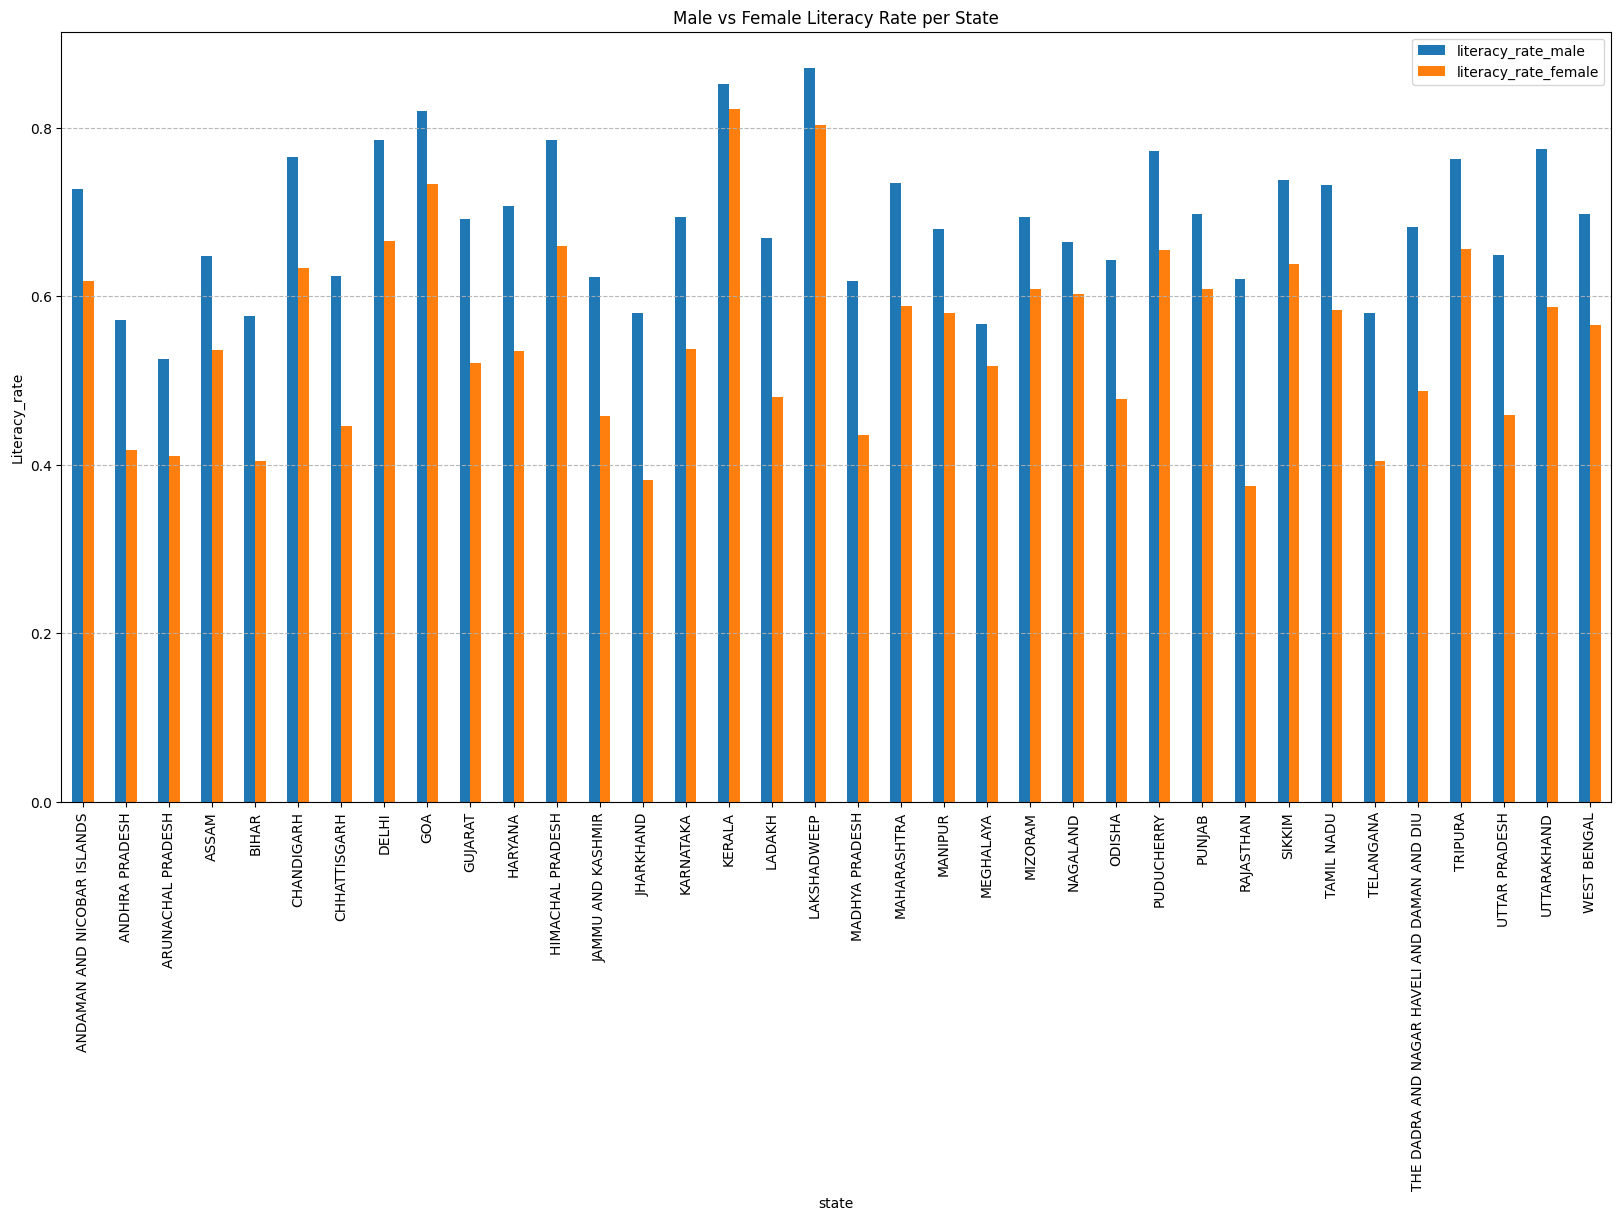

In [12]:
final[["literacy_rate_male","literacy_rate_female"]].plot(kind="bar", figsize=(20,10))
plt.ylabel("Literacy_rate")
plt.title("Male vs Female Literacy Rate per State")
plt.grid(axis="y",linestyle="--",alpha=0.9)
plt.show()

In [42]:
temp=data[["state","working_population","number_of_non_workers","number_of_male_non_workers","number_of_female_non_workers","male_working_population","female_woking_population","number_of_main_workers","number_of_male_main_workers",
      "number_of_female_main_worker","number_of_main_workers_as_cultivators","number_of_male_main_workers_as_cultivators","number_of_female_main_workers_as_cultivators",
      "number_of_main_workers_as_agricultural_labourers","number_of_male_main_workers_as_agricultural_labourers","number_of_female_main_workers_as_agricultural_labourers",
      "number_of_main_workers_in_the_household_industry","number_of_male_main_workers_in_the_household_industry","number_of_female_main_workers_in_the_household_industry",
      "number_of__main_workers_as_other_workers","number_of_male_main_workers_as_other_workers","number_of_female_main_workers_as_other_workers",
      "number_of_marginal_workers","number_of_male_marginal_workers","number_of_female_marginal_workers","number_of_marginal_workers_as_cultivators",
      "number_of_male_marginal_workers_as_cultivators","number_of_female_marginal_workers_as_cultivators","number_of_marginal_workers_as_agricultural_labourers",
      "number_of_male_marginal_workers_as_agricultural_labourers","number_of_female_marginal_workers_as_agricultural_labourers",
      "number_of_marginal_workers_in_the_household_industry","number_of_male_marginal_workers_in_the_household_industry","number_of_female_marginal_workers_in_the_household_industry",
      "number_of_marginal_workers_as_other_workers","number_of_male_marginal_workers_as_other_workers","number_of_female_marginal_workers_as_other_workers"]]
temp=temp.rename(columns={"female_woking_population":"female_working_population"})
temp1=temp.groupby("state").sum()
temp1["employment_rate(%)"]=((temp1.working_population)/(temp1.working_population+temp1.number_of_non_workers))*100
temp1["male_employment_rate(%)"]=((temp1.male_working_population)/(temp1.male_working_population+temp1.number_of_male_non_workers))*100
temp1["female_employment_rate(%)"]=((temp1.female_working_population)/(temp1.female_working_population+temp1.number_of_female_non_workers))*100
temp1["main_workers(%)"]=(temp1.number_of_main_workers/(temp1.working_population)) *100
temp1["marginal_workers(%)"]=(temp1.number_of_marginal_workers/temp1.working_population) *100
temp1["main_workers_as_cultivators(%)"]=(temp1.number_of_main_workers_as_cultivators/temp1.number_of_main_workers)*100
temp1["main_workers_as_agricultural_labourers(%)"]=(temp1.number_of_main_workers_as_agricultural_labourers/temp1.number_of_main_workers)*100
temp1["main_workers_in_household_industry(%)"]=(temp1.number_of_main_workers_in_the_household_industry/temp1.number_of_main_workers)*100
temp1["main_workers_as_other_workers(%)"]=(temp1.number_of__main_workers_as_other_workers/temp1.number_of_main_workers)*100
temp1["marginal_workers_as_cultivators(%)"]=(temp1.number_of_marginal_workers_as_cultivators/temp1.number_of_marginal_workers)*100
temp1["marginal_workers_as_agricultural_labourers(%)"]=(temp1.number_of_marginal_workers_as_agricultural_labourers/temp1.number_of_marginal_workers)*100
temp1["marginal_workers_in_household_industry(%)"]=(temp1.number_of_marginal_workers_in_the_household_industry/temp1.number_of_marginal_workers)*100
temp1["marginal_workers_as_other_workers(%)"]=(temp1.number_of_marginal_workers_as_other_workers/temp1.number_of_marginal_workers)*100
temp1.drop(columns=["working_population","number_of_non_workers","number_of_male_non_workers","number_of_female_non_workers","male_working_population","female_working_population","number_of_main_workers","number_of_male_main_workers",
      "number_of_female_main_worker","number_of_main_workers_as_cultivators","number_of_male_main_workers_as_cultivators","number_of_female_main_workers_as_cultivators",
      "number_of_main_workers_as_agricultural_labourers","number_of_male_main_workers_as_agricultural_labourers","number_of_female_main_workers_as_agricultural_labourers",
      "number_of_main_workers_in_the_household_industry","number_of_male_main_workers_in_the_household_industry","number_of_female_main_workers_in_the_household_industry",
      "number_of__main_workers_as_other_workers","number_of_male_main_workers_as_other_workers","number_of_female_main_workers_as_other_workers",
      "number_of_marginal_workers","number_of_male_marginal_workers","number_of_female_marginal_workers","number_of_marginal_workers_as_cultivators",
      "number_of_male_marginal_workers_as_cultivators","number_of_female_marginal_workers_as_cultivators","number_of_marginal_workers_as_agricultural_labourers",
      "number_of_male_marginal_workers_as_agricultural_labourers","number_of_female_marginal_workers_as_agricultural_labourers",
      "number_of_marginal_workers_in_the_household_industry","number_of_male_marginal_workers_in_the_household_industry","number_of_female_marginal_workers_in_the_household_industry",
      "number_of_marginal_workers_as_other_workers","number_of_male_marginal_workers_as_other_workers","number_of_female_marginal_workers_as_other_workers"],inplace=True)
temp1 #cleaned up
temp2=temp1.copy().sort_values("employment_rate(%)",ascending=False)
temp2

,employment_rate(%),male_employment_rate(%),female_employment_rate(%),main_workers(%),marginal_workers(%),main_workers_as_cultivators(%),main_workers_as_agricultural_labourers(%),main_workers_in_household_industry(%),main_workers_as_other_workers(%),marginal_workers_as_cultivators(%),marginal_workers_as_agricultural_labourers(%),marginal_workers_in_household_industry(%),marginal_workers_as_other_workers(%)
state,,,,,,,,,,,,,
HIMACHAL PRADESH,51.851834,58.686029,44.817335,57.944829,42.055171,44.595663,3.329356,1.585017,50.489963,76.308369,7.105919,1.738769,14.846942
SIKKIM,50.466690,60.159718,39.574689,74.770720,25.229280,35.897603,5.026975,1.253489,57.821933,44.627674,18.528190,2.900657,33.943479
NAGALAND,49.235331,53.418976,44.741171,76.086876,23.913124,56.717608,3.045283,1.285115,38.951994,50.365540,17.339435,5.715132,26.579893
CHHATTISGARH,47.681075,55.590465,39.696654,67.664711,32.335289,36.862405,30.406284,1.658587,31.072723,24.544860,65.656361,1.293255,8.505524
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU,47.436605,65.897326,21.286976,88.615533,11.384467,9.871359,2.705343,0.788704,86.634594,19.319831,37.529182,2.943403,40.207584
TELANGANA,46.686362,54.953320,38.315026,83.955010,16.044990,21.823917,33.453291,4.632730,40.090062,5.994288,50.547985,5.374547,38.083181
ANDHRA PRADESH,46.555693,58.425768,34.645363,83.694507,16.305493,16.013419,44.582573,2.736943,36.667065,6.556219,64.843568,3.557865,25.042348
LADAKH,46.284029,59.394218,28.798720,67.794127,32.205873,15.115144,1.297841,0.899310,82.687705,39.441374,10.495035,3.590471,46.473120
MANIPUR,45.682917,51.398248,39.881372,74.670821,25.329179,47.914774,4.681865,4.714201,42.689160,32.459971,20.974317,13.748650,32.817063


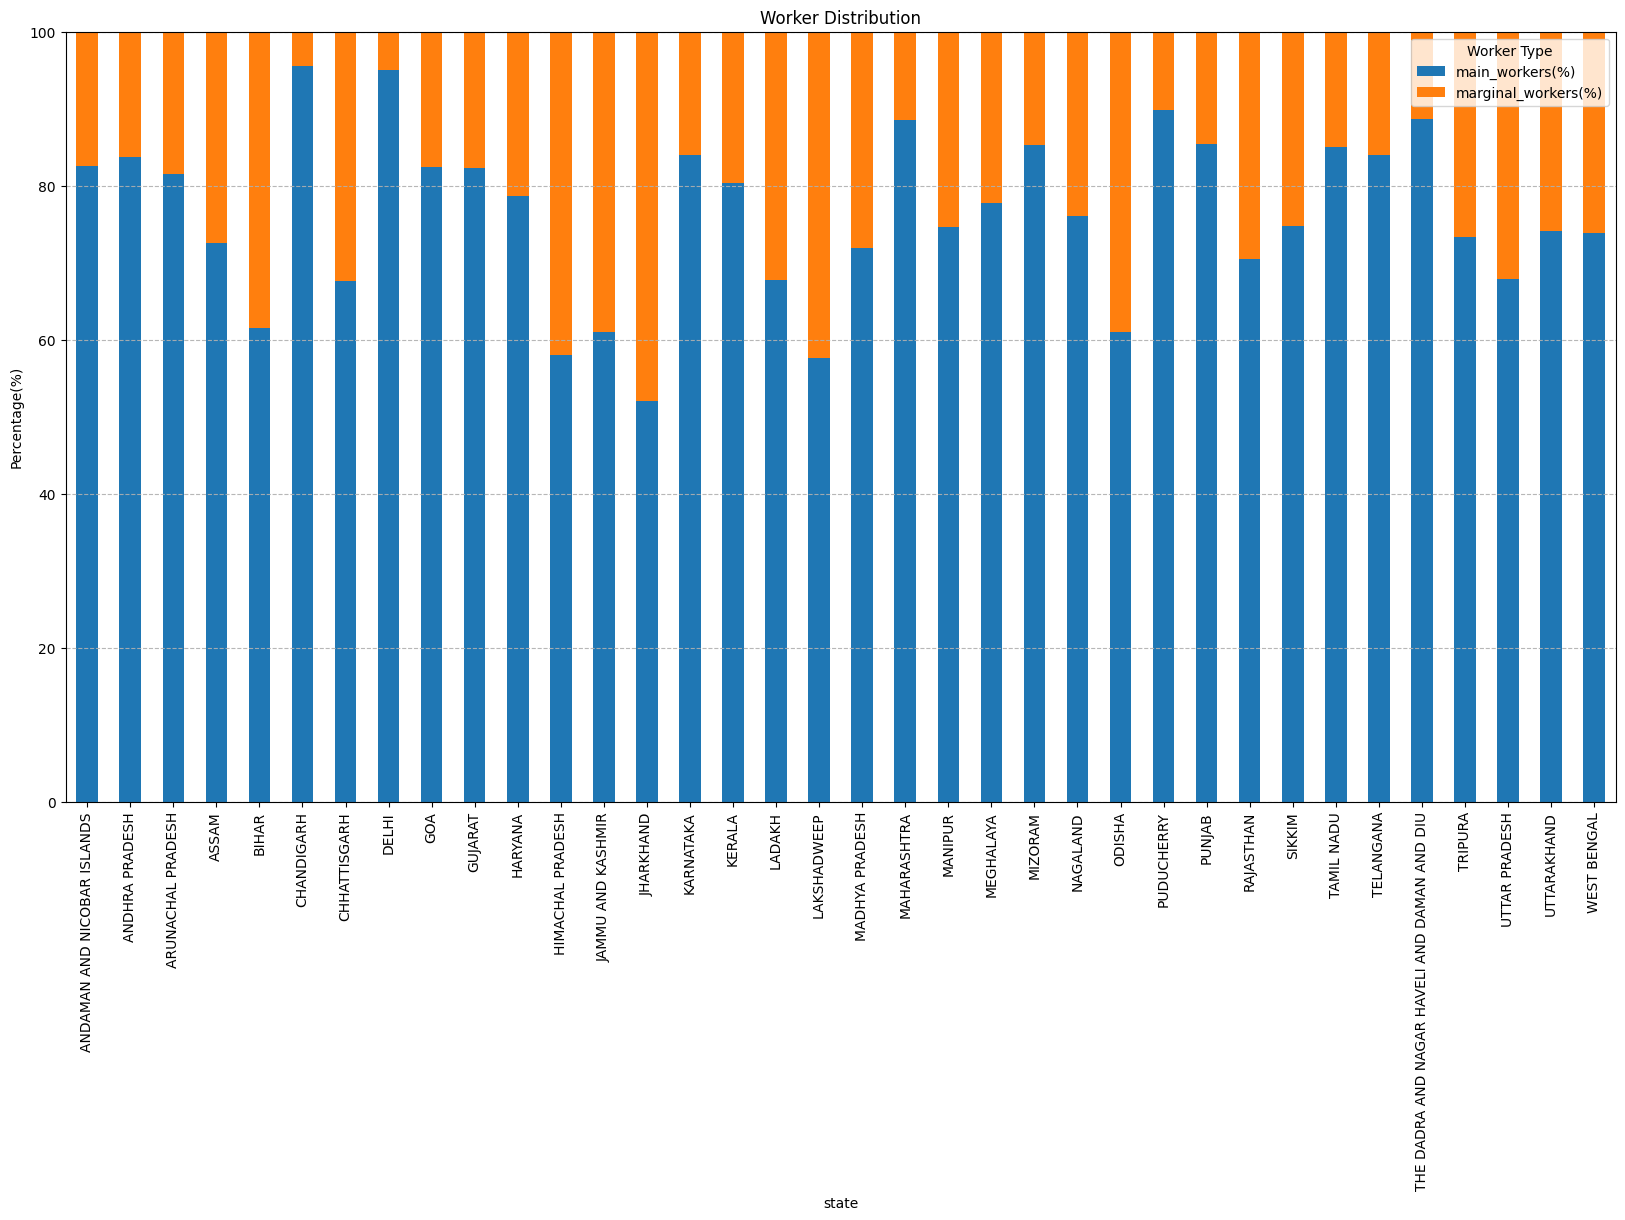

In [48]:
temp1[["main_workers(%)","marginal_workers(%)"]].plot(kind="bar",stacked=True,figsize=(20,10))
plt.ylabel("Percentage(%)")
plt.title("Worker Distribution")
plt.legend(title="Worker Type")
plt.grid(axis="y",linestyle="--",alpha=0.9)
plt.ylim(0, 100)
plt.show()

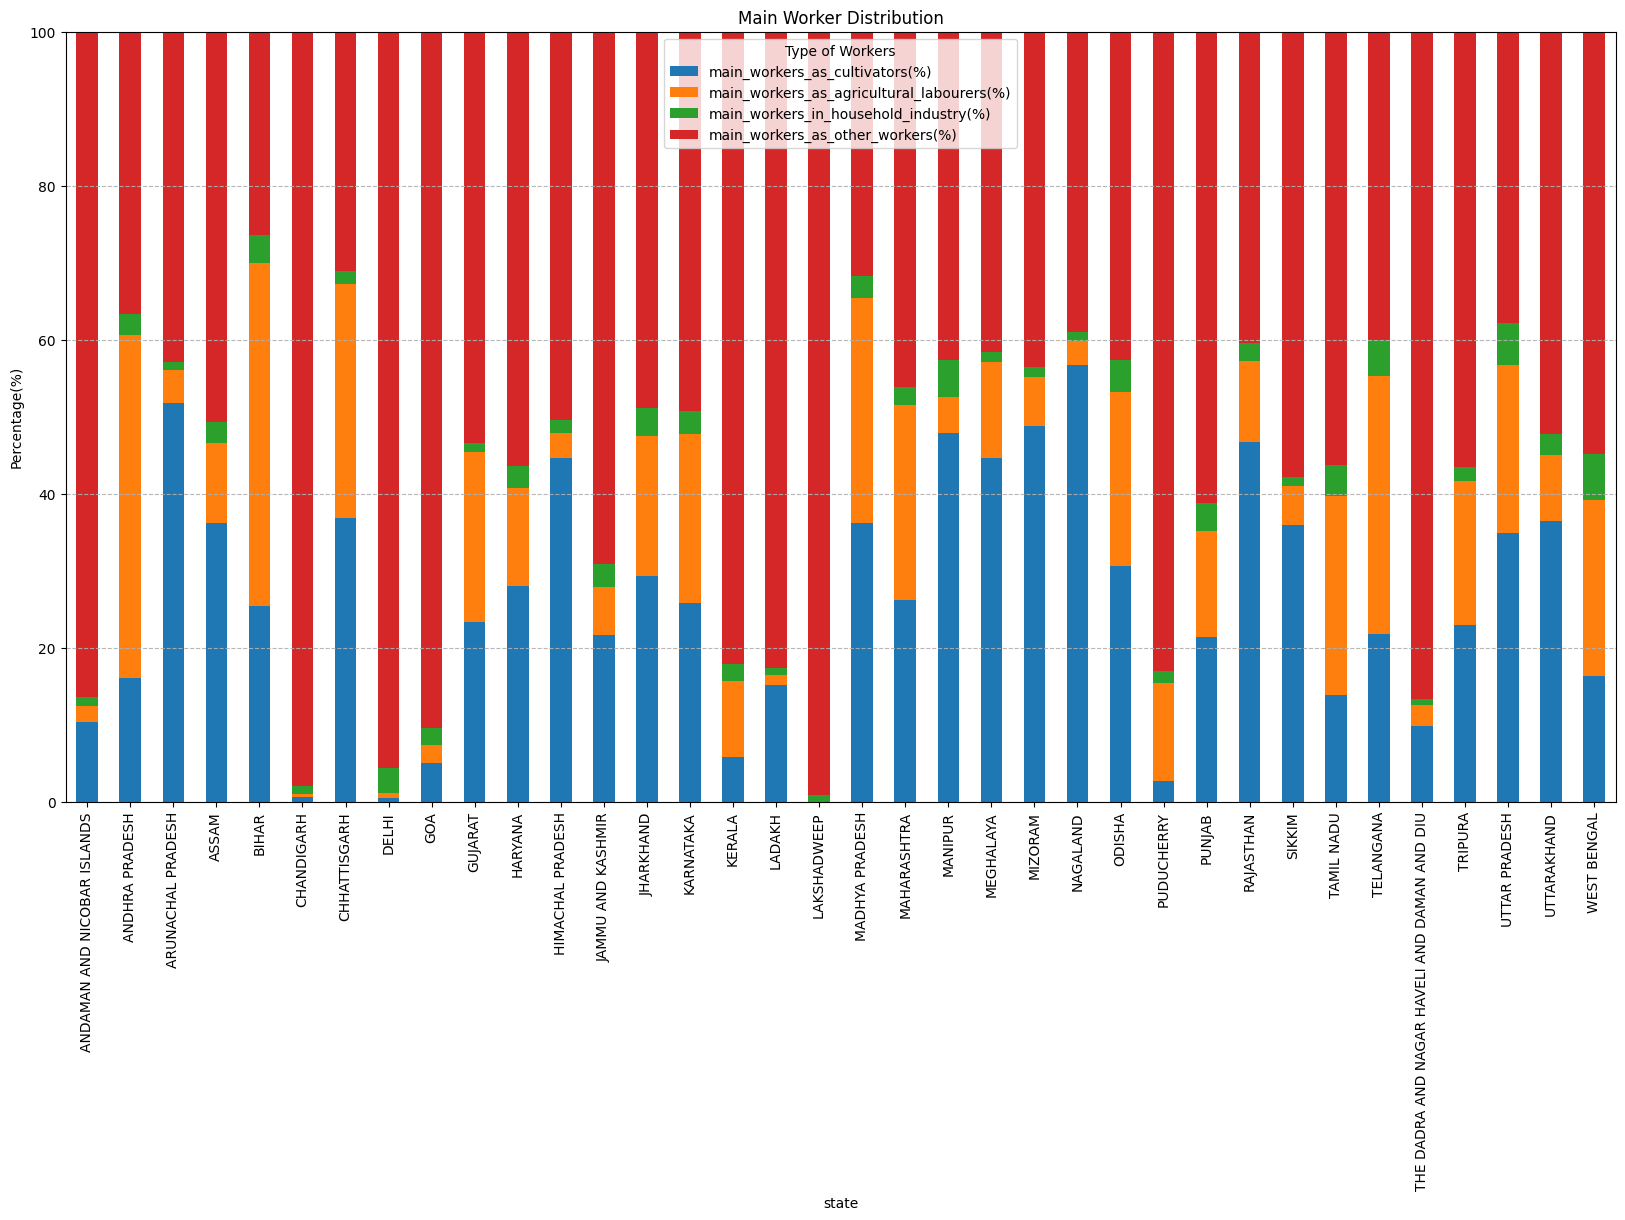

In [49]:
temp1[["main_workers_as_cultivators(%)","main_workers_as_agricultural_labourers(%)","main_workers_in_household_industry(%)","main_workers_as_other_workers(%)"]].plot(kind="bar",stacked=True,figsize=(20,10))
plt.ylabel("Percentage(%)")
plt.title("Main Worker Distribution")
plt.legend(title="Type of Workers")
plt.grid(axis="y",linestyle="--",alpha=0.9)
plt.ylim(0, 100)
plt.show()

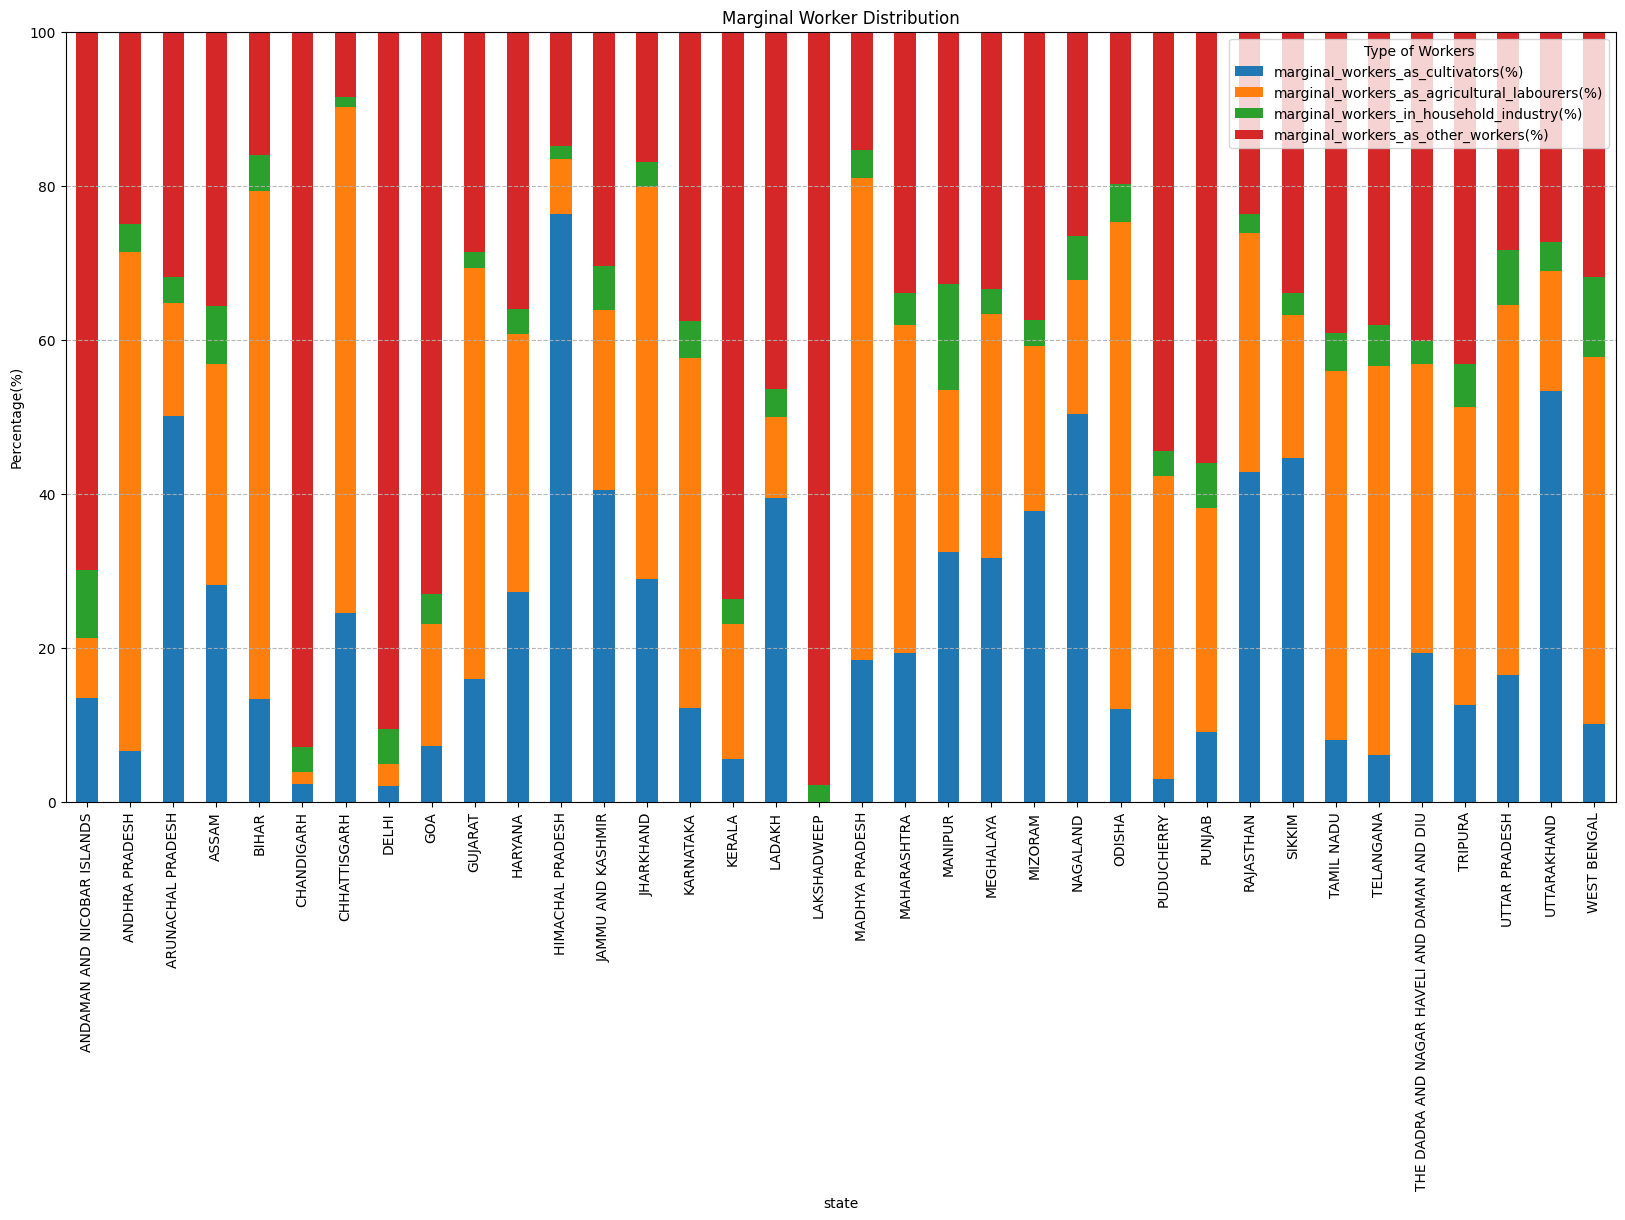

In [50]:
temp1[["marginal_workers_as_cultivators(%)","marginal_workers_as_agricultural_labourers(%)","marginal_workers_in_household_industry(%)","marginal_workers_as_other_workers(%)"]].plot(kind="bar",stacked=True,figsize=(20,10))
plt.ylabel("Percentage(%)")
plt.title("Marginal Worker Distribution")
plt.legend(title="Type of Workers")
plt.grid(axis="y",linestyle="--",alpha=0.9)
plt.ylim(0, 100)
plt.show()

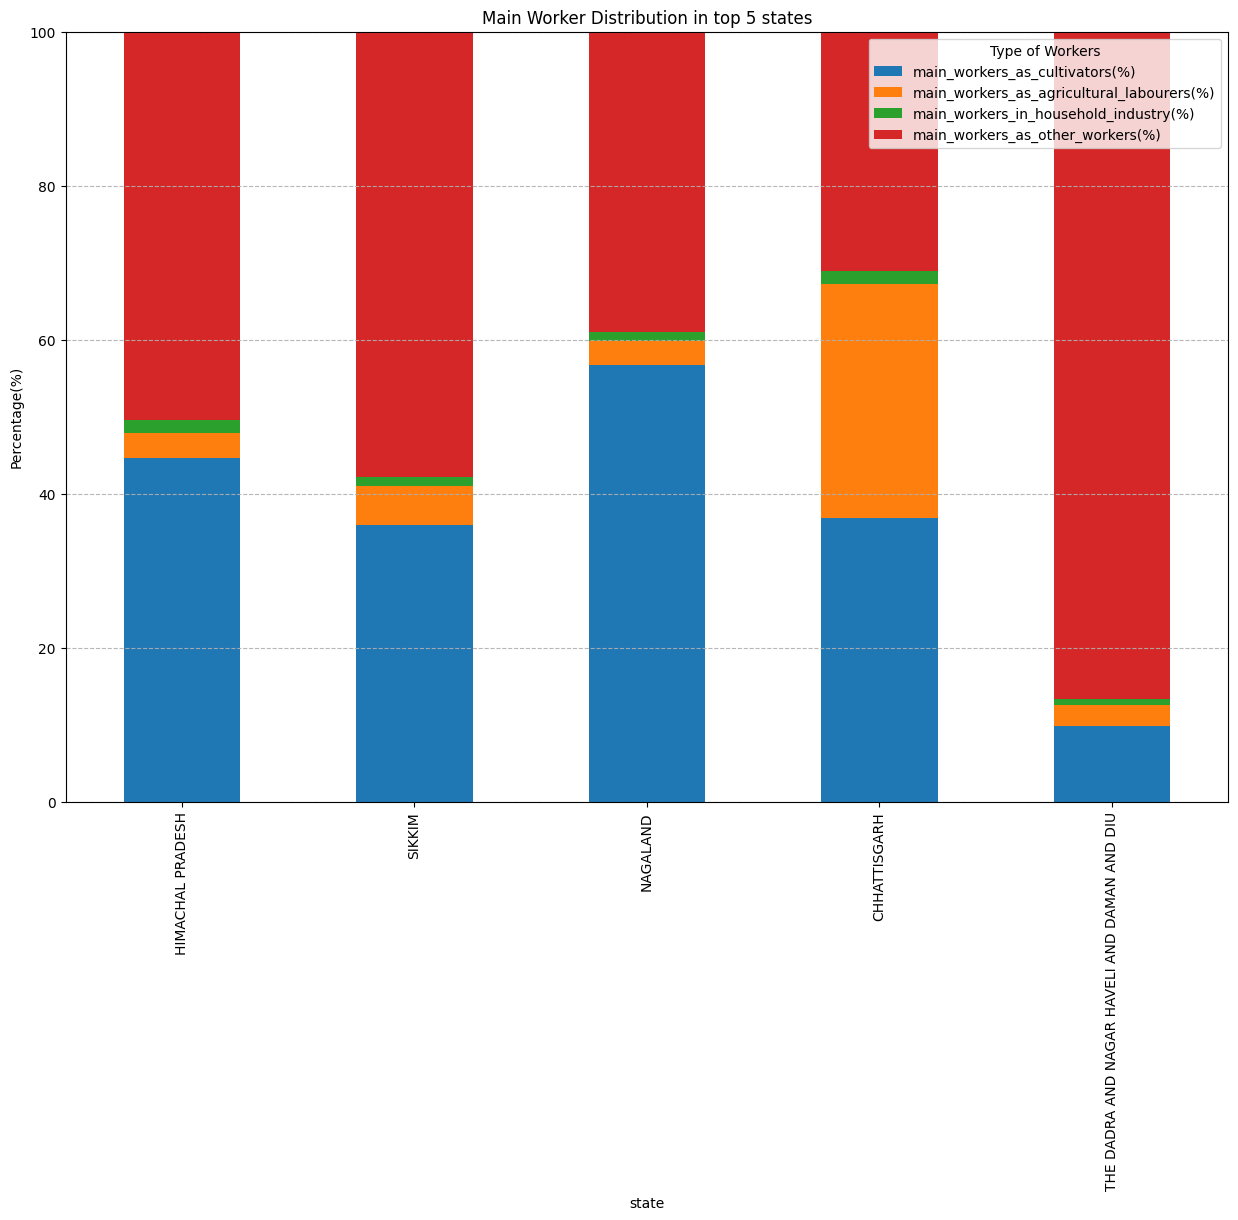

In [52]:
temp2[["main_workers_as_cultivators(%)","main_workers_as_agricultural_labourers(%)","main_workers_in_household_industry(%)","main_workers_as_other_workers(%)"]].head(5).plot(kind="bar",stacked=True,figsize=(15,10))
plt.ylabel("Percentage(%)")
plt.title("Main Worker Distribution in top 5 states")
plt.legend(title="Type of Workers")
plt.grid(axis="y",linestyle="--",alpha=0.9)
plt.ylim(0, 100)
plt.show()

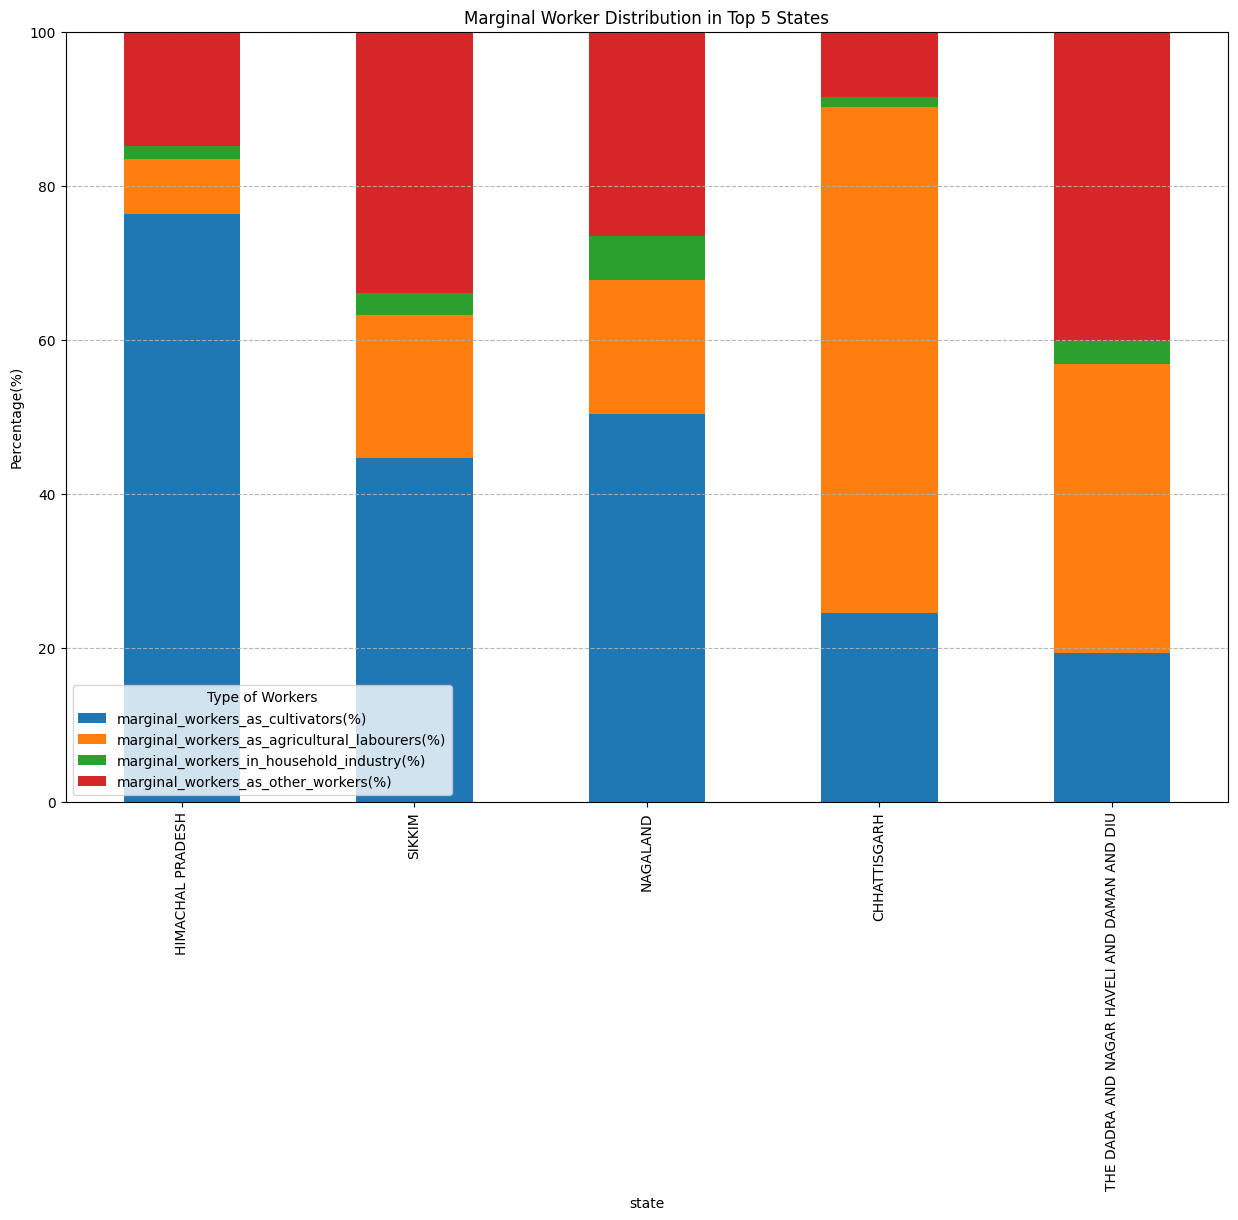

In [53]:
temp2[["marginal_workers_as_cultivators(%)","marginal_workers_as_agricultural_labourers(%)","marginal_workers_in_household_industry(%)","marginal_workers_as_other_workers(%)"]].head(5).plot(kind="bar",stacked=True,figsize=(15,10))
plt.ylabel("Percentage(%)")
plt.title("Marginal Worker Distribution in Top 5 States")
plt.legend(title="Type of Workers")
plt.grid(axis="y",linestyle="--",alpha=0.9)
plt.ylim(0, 100)
plt.show()

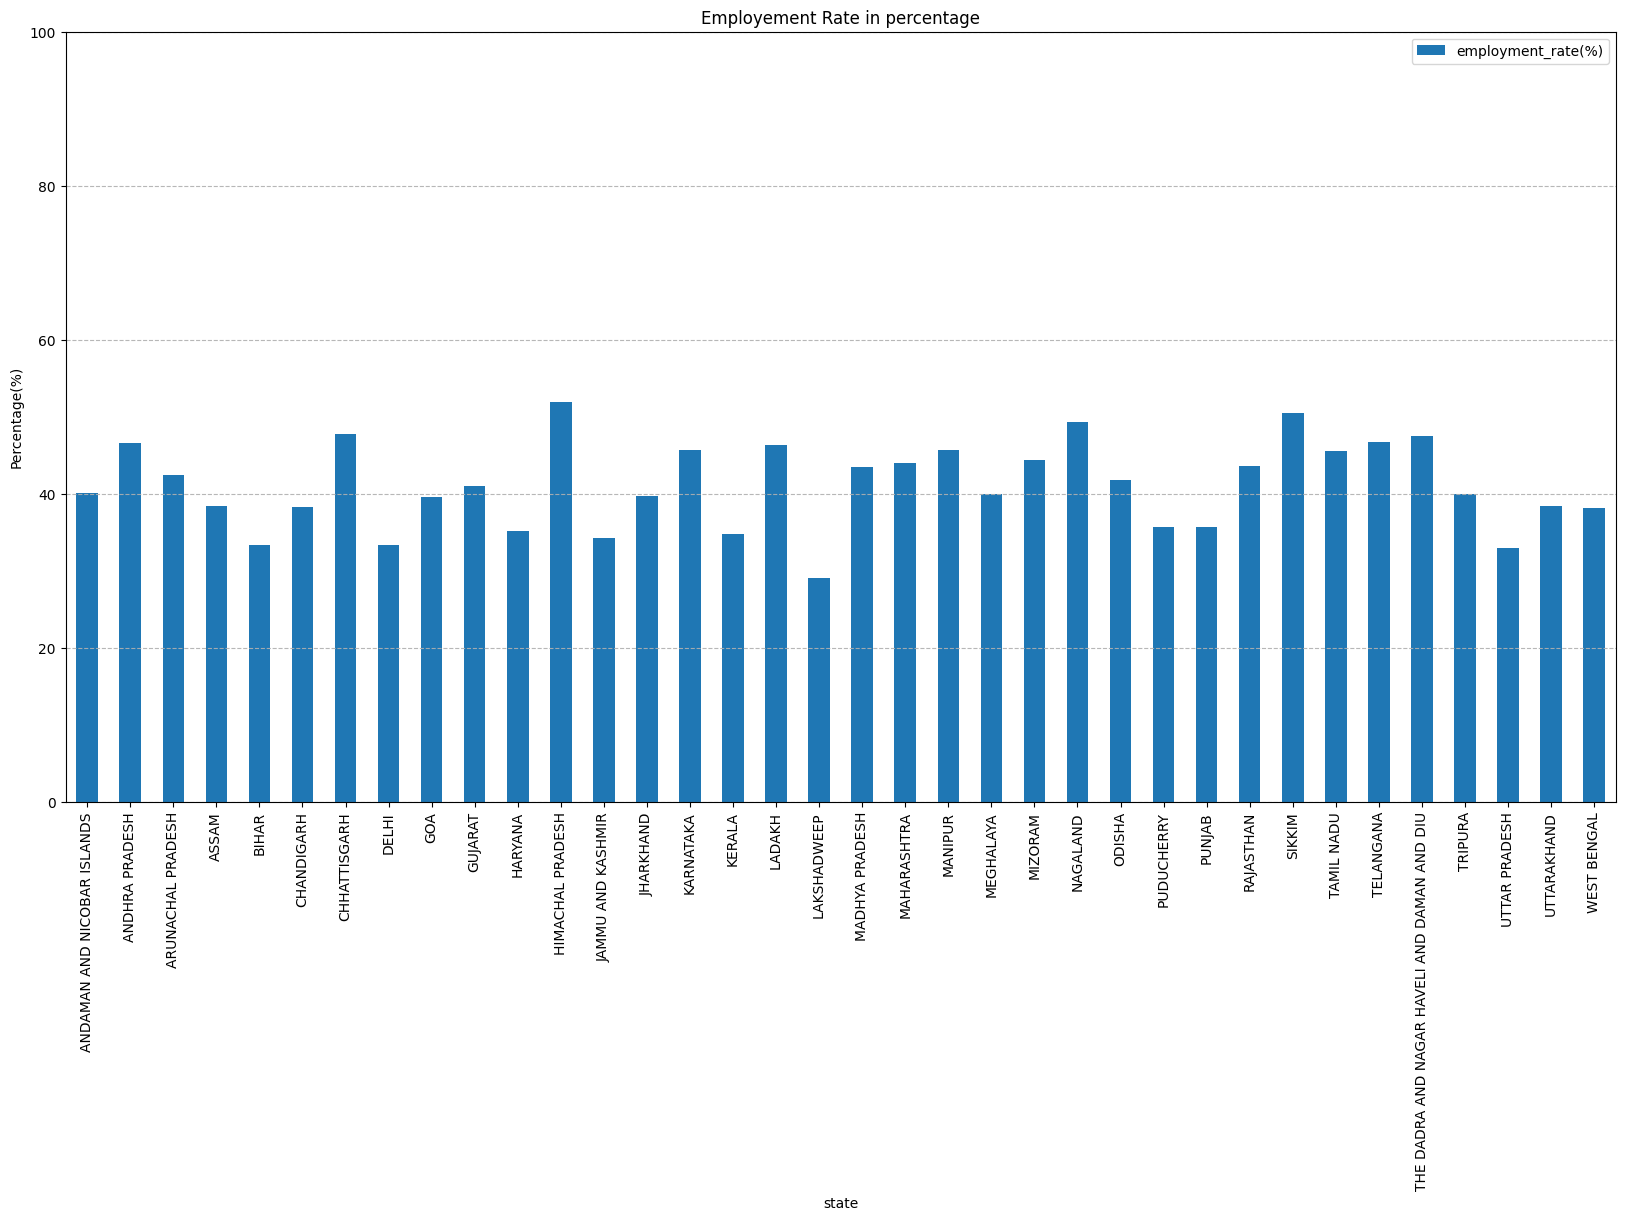

In [55]:
temp1[["employment_rate(%)"]].plot(kind="bar",figsize=(20,10))
plt.ylabel("Percentage(%)")
plt.title("Employement Rate in percentage")
plt.grid(axis="y",linestyle="--",alpha=0.9)
plt.ylim(0, 100)
plt.show()